# **Informe final**

El plan de trabajo planteado incluía:
1. Unificar dataframes con categórias potenciales seleccionadas, corregir estilo, tipo de datos, cambiar valores y crear columnas en donde fuera necesario. 
2. Codificar columnas categóricas, estandarizar los datos y redimensionar si era necesario. 
3. Crear sets de entrenamiento y prueba y entrenar distintos modelos de clasificación binaria hasta lograr un AUC-ROC mayor a 0.88

Durante la ejecución del plan de trabajo se encontraron valores ausentes, tipos de datos inadecuados en algunas características, como tipo object donde debía ser numérico o visceversa, y también la oportunidad de crear la característica de duración de contrato, que posteriormente sería la más importante para el entrenamiento de los modelos. Esta característica se calculó con la diferencia entre las fechas de inicio de los contratos y la fecha de cierrre del contrato (para los que ya habían cancelado) o la fecha de la toma de datos (para los clientes activos, 1 de febrero de 2020).

Al explorar esta característica, se encontraron los tiempos a los cuales el 25%, 50% y 75% de los clientes habían cancelado su contrato y la distribucion de duración de los contratos vigentes.

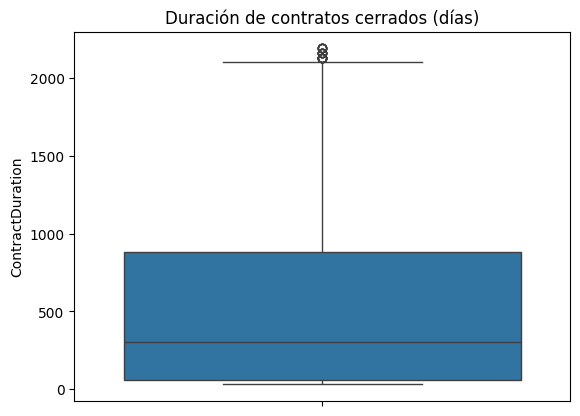

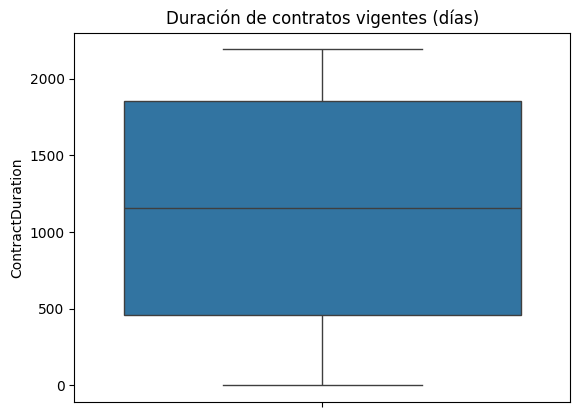

La exploración del balance de clases no se consideró en el plan de trabajo inicial, pero se realizó de cualquier manera al ser esencial para el entrenamiento y prueba de los modelos. Gracias a eso se encontró el notorio desbalance y la necesidad de remuestreo para solucionarlo. Para lograrlo se utilizó el método SMOTE Tomek para combinar sobremuestreo y submuestreo, logrando un balance 50:50 entre las clases objetivo.

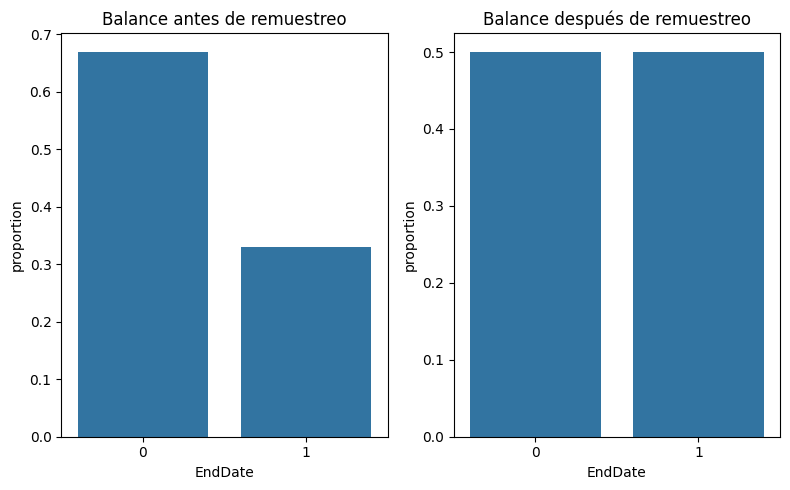

En el plan de trabajo se considero redimensionar los datos, en caso de que fuera necesario, para optimizar el tiempo de entrenamiento de los modelos o el desempeño de los mismos. Si bien, sí se probó el redimensionamiento con el método de PCA, el desempeño de los modelos no mejoró, ni tampoco el tiempo de entrenamiento, por lo que mejor se omitió ese paso y solo se realizaron las transformaciones indispensables como codificación One Hot para características categóricas, con descarte de las primeras columnas para evitar la multicolinealidad, y escalamiento estandar para características numéricas.

Para asegurar un óptimo escalamiento de los datos numéricos se exploraron las distribuciones y existencia de valores atípicos, encontrando ausencia de los últimos y una distribución normal en los cargos mensuales. (ver imagen siguiente). 

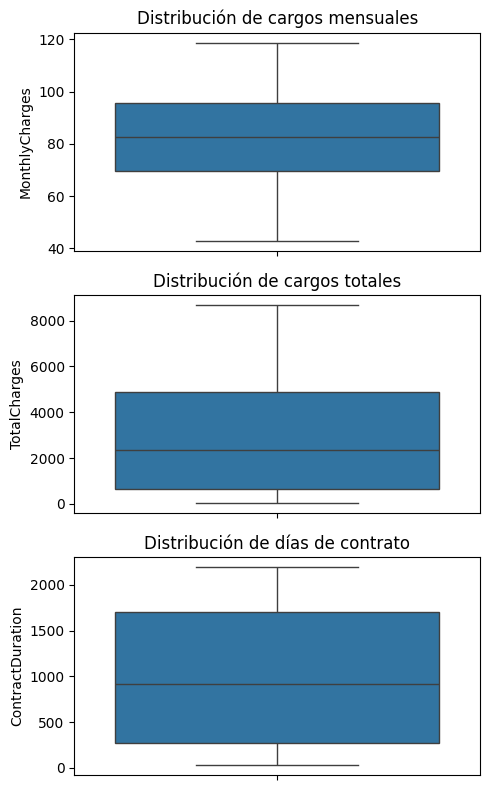

La correcta implementación de las transformaciones anteriores se verificaron con una muestra del dataframe con nuevas columnas binarias (0 y 1) para la codificación One Hot, y calculando la media y la desviación estándar, cercanas a 0 y 1, para las características numéricas estandarizadas. 

Si bien, los cargos totales tenían un sesgo a la derecha y los días de contrato no tenián distribución normal, no fue impedimento para la correcta estandarización.

Al final de estas transformaciones, las características pasaron de 17 originales a 22 y el conjunto de entrenamiento pasó de 3865 observaciones a 4832 (25% más datos de entrenamiento).

Se probaron 4 modelos de clasificación binaria, usando como métrica principal ROC-AUC y como métrica secundaria la exactitud (accuracy).

Los modelos probados fueron: regresión logística, bosque aleatorio, Light GBM y XGBoost. A los últimos tres se le realizó optimización de hiperparámetros utilizando el metodo GridSearchCV para automatizar la búsqueda y probar validacion cruzada simultáneamente, ya que los datos solo se dividieron en conjunto de entrenamiento y prueba.

También se creó un modelo dummy classifier como referencia.

El **modelo de descenso de gradiente LGBM** obtuvo las mejores métricas de los modelos probados:

    - ROC-AUC de 0.89
    - Accuracy de 0.84

Por lo que se logró y superó efectivamente el objetivo de la métrica propuesta (ROC - AUC de 0.88)

Cada modelo entrenado otorgó importancia a distintas características, pero en el modelo con mejor performance las más relevantes fueron (ver imagen siguiente):

    1. Duración de contrato
    2. Pagos totales realizados
    3. Contrato de pagos mensuales
    4. Pagos con cheque electrónico
    5. Internet de fibra óptica
    
De la misma manera, las características menos relevantes fueron:

    1. Contratos anuales
    2. Servicio de streaming de películas 
    3. Pagos con tarjeta de crédito
    4. Servicio de protección de dispositivos
    5. Pagos por transferencia bancaria

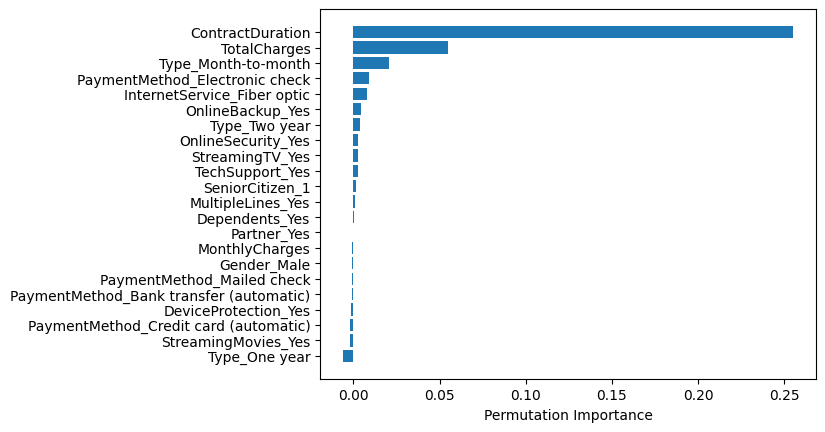

Se podría crear una estrategia para prevenir la cancelación de contratos con los clientes con predicciones positivas, cuyos pagos se realicen mes a mes y que estén por cumplir los primeros 60, 300 y 900 días de servicio y cuyos pagos totales estén por arriba del promedio obtenido para estos periodos:

    - 60 días: $76 usd
    - 300 días: $220 usd
    - 900 días: $628 usd

De esta manera se estaría dirigiendo el esfuerzo de retención a los clientes con las tres características más importantes en el modelo predictivo.